# Opening a Gym in London 2021

## Business Proposal

### Background information: 

London is a sprawling city with a population of roughly 8.96 million people. It is by far the largest city in the UK. Being a metropolitan city, it is home to a massive array of restaurants, cafes, and fast-food places. All of which serve a wide variety of cuisines to suite London’s incredibly diverse population.

The availability and ease at which it is to dine out in london might explain why in 2017/2018 roughly 56% of adults were classified as overweight or obese. And, by contrast, a significantly higher number percentage of young children were classed as overweight or obese.

Furthermore, with the recent Covid-19 pandemic and the lockdown measures that followed. For both schools and sports facilities. It is reasonable to assume that many of London’s residences saw a decline in their physical activity levels, it is important to note that many have used the extra time afford to work out from home.

So, if someone either living in London or is thinking of moving to London and is either looking to stay in shape or become more active it might be useful if they have some information about the availability of Gyms and their quality.

Moreover, with the potential of contracting Covid and the UK’s lockdown policies. Prior information of vaccination data per region might help in making more informed decision. Such as, choosing a gym in an area which boasts a higher vaccination registration than other. Thus, using data from the Office of National Statistics, London Datastore, and the Foursquare API, gyms will be listed and visualised.


### The objective: 

Say perhaps you are someone who lives in London and is currently searching for a gym, or perhaps you have aspirations to be a gym owner. Where is the ideal place to open a gym during covid times?

Well, by utilising, the average health index of each brough, the registered number of vaccinations per borough in London, and foursquare API. Gyms throughout the UK can be visualised, rated and listed.


### Target Audience: 

There are three main audience’s this project will target:
<ul>
    <li>London residents looking for a gym</li>
    <li>Travelers looking to join a gym</li>
    <li>People looking to open up a new gym</li>
</ul>

## Data Description:

### The Health Index 2015 - 2018. Source: The Office of National Statistics



Source: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/datasets/healthindexengland

The health index is an experimental statistic that is used to measure a broad definition of health, that can be tracked over time and compared between different area. This will be used to offer an idea the varying level of health between the boroughs. Please note, that measuring health in a form that allows for comparison is incredibly difficult and thus, this should only be taken as an estimate of the overall health levels in each borough.

The Health Index has been scaled to a base of 100 for England, with base year of 2015. Values higher than 100 indicate better health than England 2015, and values below 100 indicate worse health. The scale is such that a score of 110 represents a score one standard deviation higher than England 2015’s score for that same indicator. In this way comparisons both over time and within a single year are simple to understand.

While this dataset is incredibly diverse and much of the data can be scoured for further insights. For the scope of this project, we will be looking at the three main domain scores
<ul>
    <li>Healthy People – focusing on health outcomes</li>
    <li>Healthy Lives – health-related behaviours and personal circumstances</li>
    <li>Healthy Places – wider determinants of health, environmental factors</li>
</ul>
And their overall scores between 2015 – 2018.

### Coronavirus (Covid-19) Cases and Vaccinations. Source: Greater London Authority

Source: https://data.london.gov.uk/dataset/coronavirus--covid-19--cases

Covid Vaccination data in London is going to be used for two prominent reasons. Firstly, this data will become useful in the long run to business who are looking to open a gym. Gyms, saw a massive decline in profit and attendance due to the lockdown measures. Having information about which areas in London have a higher covid vaccination rate may offer some peace of mind. As it is possible those area to have a lower covid reproduction rate. This in turn means that it is less likely (but not certain) that these areas will see less strict lockdown measures in the future. Meaning gyms in these areas may be able to remain open.

The second reason, in a similar vein, address clients. With Covid-19 being a worry, many people have realised that going to gyms carries the risk of catching covid. So, knowing which areas of London have a lower vaccination rate and thus may carry a future high covid – 19 reproduction rates. It is possible to avoid gyms in those areas and subscribe to gyms in boroughs where vaccinations are high.

The dataset itself, is quite comprehensive, it is broken into two major categories: 1st dose and 2nd dose. For this project, we will only be considering those who have had two doses as vaccinated. And will only be looking at the cumulative number of vaccinations per borough.


### FourSquare API Gym

This data will simply leverage the foursquare API to create a dataset of all the registered gyms in London per borough and will be used to rate, list and visualise them.

# The Code

## Gathering The Data: 

Not all of the data need to begin the analysis is readily avalible. So to obtain the loaction data of London's boroughs, we will frist start by web scraping a list of the boroughs from the wikipedia page in a dataframe. 

In [92]:
!pip install bs4
!pip install requests 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [93]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib as mpl
print('importation complete')

importation complete


In [36]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_London_boroughs&oldid=1018035317"
data = requests.get(url).text
soup = BeautifulSoup(data, "html5lib")
tables = soup.find_all('table')

In [37]:
len(table)

1

As the above output tells us there are 5 different tables within the webpage. We can use a keyword such as brough to identify the correct table

In [38]:
for index,table in enumerate (table): 
    if ("Borough" in str(table)):
        table_index = index
print(table_index)

0


In [39]:
B_data = pd.read_html(str(tables[0]), flavor ='bs4')
B_data

[                            Borough     Inner Status  \
 0     Barking and Dagenham [note 1]       NaN    NaN   
 1                            Barnet       NaN    NaN   
 2                            Bexley       NaN    NaN   
 3                             Brent       NaN    NaN   
 4                           Bromley       NaN    NaN   
 5                            Camden       NaN    NaN   
 6                           Croydon       NaN    NaN   
 7                            Ealing       NaN    NaN   
 8                           Enfield       NaN    NaN   
 9                Greenwich [note 2]  [note 3]  Royal   
 10                          Hackney       NaN    NaN   
 11  Hammersmith and Fulham [note 4]       NaN    NaN   
 12                         Haringey  [note 3]    NaN   
 13                           Harrow       NaN    NaN   
 14                         Havering       NaN    NaN   
 15                       Hillingdon       NaN    NaN   
 16                         Hou

In [40]:
B_df = pd.read_html(str(tables[0]), flavor ='bs4')[0]
B_df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


Now that we have our table, we can perform some simple data cleaning by removing the any columns that are unecessary. 

### Data Cleaning

In [41]:
B_df = B_df.drop(['Inner', 'Status', 'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)', "Co-ordinates", "Population (2019 est)[1]", "Nr. in map"], axis = 1)

In [42]:
B_df.head()

,Borough
0,Barking and Dagenham [note 1]
1,Barnet
2,Bexley
3,Brent
4,Bromley


lets quickly get rid of the words that say "[note]" from our entries

In [43]:
B_df.loc[0, 'Borough'] = 'Barking and Dagenham'
B_df.loc[9, 'Borough'] = 'Greenwich'
B_df.loc[11, 'Borough'] = 'Hammersmith and Fulham'
B_df.head()

,Borough
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley


Before we go any further, lets incoorperate the Postcodes and the Foursquare API to visualise our boroughs.

In [44]:
codes = df_data_1[['Area Codes']].copy()

In [45]:
codes = codes.sort_values('Area Codes', ascending = True)
pcodes = codes.reset_index(drop = True)
pcodes.head()

,Area Codes
0,E09000002
1,E09000003
2,E09000004
3,E09000005
4,E09000006


Form here it is possible to use the Geocoder API to obtain the coordinates for each borough. However, as the API can sometimes be unreliable and time consuming <b> we will simply be using the coordinates from a csv file I have obtained from the Greater London Authority.</b> 

In [46]:

body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='Borough Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Coord = pd.read_csv(body)
Coord


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.554117,0.150504
1,Barnet,51.653090,-0.200226
2,Bexley,51.441679,0.150488
3,Brent,51.563996,-0.275906
4,Bromley,51.402805,0.014814
5,Camden,51.542305,-0.139560
6,Croydon,51.371305,-0.101957
7,Ealing,51.512655,-0.305195
8,Enfield,51.652085,-0.081017
9,Greenwich,51.482084,-0.004542


In [47]:
geo = Coord.join(pcodes)

In [48]:
geo = geo[['Area Codes', 'Borough', 'Latitude', 'Longitude']]
geo

,Area Codes,Borough,Latitude,Longitude
0,E09000002,Barking and Dagenham,51.554117,0.150504
1,E09000003,Barnet,51.653090,-0.200226
2,E09000004,Bexley,51.441679,0.150488
3,E09000005,Brent,51.563996,-0.275906
4,E09000006,Bromley,51.402805,0.014814
5,E09000007,Camden,51.542305,-0.139560
6,E09000008,Croydon,51.371305,-0.101957
7,E09000009,Ealing,51.512655,-0.305195
8,E09000010,Enfield,51.652085,-0.081017
9,E09000011,Greenwich,51.482084,-0.004542


With a clean dataframe of london's boroughs we can import the Foursquare API and visualise the Boroughs. 

## Visualising the Boroughs

In [26]:
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install geocoder
import geocoder
from geopy.geocoders import Nominatim

!pip install folium 
import folium 
print('importing complete')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 11.2 MB/s eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

To visualise the boroughs we will be using geocoder. As such, it is important to define a user agent. In this case we will call that <i> London_explorer. </i>

Once the coordinates for London has been obtained we can move forward and build a map, on which we can superimpose the boroughs to help visualise them. 

In [27]:
address ='London, UK'
geolocator = Nominatim(user_agent = "London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates for London, UK are {}, {}.'.format(latitude, longitude))

The coordinates for London, UK are 51.5073219, -0.1276474.


In [28]:
map_london = folium.Map(location =[latitude, longitude], zoom_start = 10)
for lat, lng, borough in zip(geo['Latitude'], geo['Longitude'], geo['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker(
        [lat,lng],
        radius = 8,
        popup = label,
        color = 'purple',
        fill = True,
        fill_opacity =0.4, 
        parse_html = False).add_to(map_london)
    
map_london

We can now see each of London's boroughs makred by the purple dot. Clicking on a dot will reveal the boroughs name. With this visualised we can move on to devloping this location data along side the Health compents; The Health Index and Vaccination Data. 

# The Health Index 2015 - 2018 Data

Due to the increibly large size of the dataset. In the sense, that it contains data pertaining the entirety of the UK. As well as, an incredibly diverse number of attributes to used to develope a health score for a particular borough. It would take an incredible long time to clean, explore and anaysise all of the data. <b>As such, I will only be looking at the major doimain scores for each London borough as stipulated by the dataset itself.</b>

Furthermore, for simplicity, a rather large part of the cleaning process will take place within the excel document. As otherwise it would take an exorbitant amount of time and space in this project to simple arrive at part of a useable dataset. Please note that none of data entries will altered by anymeans. 

In [17]:
!pip install xlrd

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [27]:
# The code was removed by Watson Studio for sharing.

,Area Codes,Area Names,2015 Overall Health Index (AVG),2015 Healthy People,2015 Healthy Lives,2015Healthy Places
0,E09000007,Camden,99.7,104.5,104.2,90.3
1,E09000012,Hackney2,97.3,101.4,98.4,92.1
2,E09000013,Hammersmith and Fulham,100.3,107.1,98.9,94.8
3,E09000014,Haringey,98.2,104.4,95.8,94.5
4,E09000019,Islington,97.7,100.0,101.5,91.7


The cell above uses Watsons' inbuilt "Insert to Code" to upload the data. The cell is removed on publication due to it containing sensitive information. With that said lets rename the data frame and proceed with sorting the data and then merging the our two data frame. 

In [19]:
HI15_df = df_data_1
HI15_df = HI15_df.sort_values(by = ["Area Names"], ascending = True)

In [29]:
HI15 = HI15_df.rename(columns = {"Area Names": "Borough"})
HI15.head()

,Area Codes,Borough,2015 Overall Health Index (AVG),2015 Healthy People,2015 Healthy Lives,2015Healthy Places
13,E09000002,Barking and Dagenham,97.2,103.9,90.9,96.9
14,E09000003,Barnet,103.6,111.1,102.6,97.1
15,E09000004,Bexley,101.6,103.5,99.8,101.5
16,E09000005,Brent,100.0,108.9,96.3,94.9
17,E09000006,Bromley,104.0,107.5,105.0,99.5


Now lets move on to uploading our data for 2016, 2017, and 2018. Then, we can proceed with some exploration of the data and examine any trends within. 

In [30]:

body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='2016HI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

In [31]:
HI16_df = df_data_2
HI16_df = HI16_df.sort_values(by = ["Area Names"], ascending = True)
HI16 = HI16_df.rename(columns = {"Area Names": "Borough"})
HI16.head()

,Area Codes,Borough,2016 Overall Health Index (AVG),2016 Healthy People,2016 Healthy Lives,2016 Healthy Places
13,E09000002,Barking and Dagenham,97.9,103.8,93.1,96.9
14,E09000003,Barnet,103.0,107.7,104.6,96.6
15,E09000004,Bexley,102.6,104.6,103.0,100.3
16,E09000005,Brent,101.0,110.9,97.0,95.0
17,E09000006,Bromley,103.7,106.0,106.2,98.9


In [33]:

body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='2017HI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)

In [34]:
HI17_df = df_data_3
HI17_df = HI17_df.sort_values(by = ["Area Names"], ascending = True)
HI17 = HI17_df.rename(columns = {"Area Names": "Borough"})
HI17.head()

,Area Codes,Borough,2017 Overall Health Index (AVG),2017 Healthy People,2017 Healthy Lives,2017 Healthy Places
13,E09000002,Barking and Dagenham,99.8,108.1,94.3,97.0
14,E09000003,Barnet,103.0,107.9,105.0,96.2
15,E09000004,Bexley,101.7,104.0,101.4,99.6
16,E09000005,Brent,100.5,111.2,96.1,94.2
17,E09000006,Bromley,103.1,104.0,107.0,98.5


In [35]:
body = client_00351be64b57450eaf33fd998a32ad79.get_object(Bucket='courseracapstone-donotdelete-pr-wtd0ix3cytpbhw',Key='2018HI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)

In [36]:
HI18_df = df_data_4
HI18_df = HI18_df.sort_values(by = ["Area Names"], ascending = True)
HI18 = HI18_df.rename(columns = {"Area Names": "Borough"})
HI18.head()

,Area Codes,Borough,2018 Overall Health Index (AVG),2018 Healthy People,2018 Healthy Lives,2018 Healthy Places
13,E09000002,Barking and Dagenham,98.6,106.0,94.0,95.7
14,E09000003,Barnet,102.1,106.0,104.7,95.6
15,E09000004,Bexley,102.5,104.7,102.9,99.9
16,E09000005,Brent,101.3,113.5,96.4,93.9
17,E09000006,Bromley,103.2,104.6,106.6,98.3


### Health Index Trends 

 Now, with all of th Health index data loaded into data frames, let's look at the trends across each borough. Starting with the subdomains before looking at the overall health Index. 

#### Healthy People Index 

This is the first of the three subdomins in the health index data that we will be using to understand how the overall health index is useful to helping people understand the overall healthness of their borough or neighbouring boroughs. This subdomain, as stated in the data section of the report, focuses on health outcomes. The attributes used to develope this Healthy people index socre are: Mortaliy, Physical Health Conditions, Difficulties in daily life, Personal well being, and Mental Health. As you can see this subdomin focuse on the helath aspect of people.

First lets create a new dataframe that contains the area codes, boroughs and the 2015 healthy people

In [37]:
HP15 = HI15
HP15.head()

,Area Codes,Borough,2015 Overall Health Index (AVG),2015 Healthy People,2015 Healthy Lives,2015Healthy Places
13,E09000002,Barking and Dagenham,97.2,103.9,90.9,96.9
14,E09000003,Barnet,103.6,111.1,102.6,97.1
15,E09000004,Bexley,101.6,103.5,99.8,101.5
16,E09000005,Brent,100.0,108.9,96.3,94.9
17,E09000006,Bromley,104.0,107.5,105.0,99.5


In [38]:
HP15 = HP15[['Borough', '2015 Healthy People']].copy()
HP15.head()

,Borough,2015 Healthy People
13,Barking and Dagenham,103.9
14,Barnet,111.1
15,Bexley,103.5
16,Brent,108.9
17,Bromley,107.5


Now that we have a new data frame, lets extract the healthy people columns from the other Health index years and then join them altogether.

In [39]:
HP16 = HI16[['2016 Healthy People']].copy()
HP17 = HI17[['2017 Healthy People']].copy()
HP18 = HI18[['2018 Healthy People']].copy()

In [40]:
HP56 = HP15.join(HP16)
HP567 = HP56.join(HP17)
HP = HP567.join(HP18)
HP.set_index('Borough', inplace = True)
df_HP = HP.rename(columns ={'2015 Healthy People': '2015', '2016 Healthy People': '2016', '2017 Healthy People': '2017', '2018 Healthy People': '2018'})
df_HP.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,103.9,103.8,108.1,106.0
Barnet,111.1,107.7,107.9,106.0
Bexley,103.5,104.6,104.0,104.7
Brent,108.9,110.9,111.2,113.5
Bromley,107.5,106.0,104.0,104.6


Now that we have a data frame that focuses just on the healthy people subdomain. We can perform some surface level data exploration to hopefully gain some insight. We can infact plot the trend of all of these boroughs over the years to see how their improvement, ass shown in the cells below. <b> However, as there are 32 different boroughs, it would be incredibly difficult to gain much insight from this. </b> 

In [41]:
df_HP0 = df_HP.astype(float)
df_HP0 = df_HP.transpose()
df_HP0.head()

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2015,103.9,111.1,103.5,108.9,107.5,104.5,105.0,108.7,107.3,100.8,...,109.1,111.0,111.6,114.9,104.2,102.5,103.7,107.7,111.2,109.5
2016,103.8,107.7,104.6,110.9,106.0,107.1,106.7,105.0,105.2,102.4,...,108.6,110.0,109.4,111.9,104.4,106.3,107.3,111.2,111.6,110.7
2017,108.1,107.9,104.0,111.2,104.0,103.3,103.8,107.6,107.8,104.6,...,107.8,107.8,108.0,110.2,106.1,108.8,105.3,109.6,111.9,111.2
2018,106.0,106.0,104.7,113.5,104.6,105.9,106.2,108.0,104.2,104.9,...,108.9,109.3,109.2,110.2,103.9,107.9,107.8,107.0,111.9,111.2


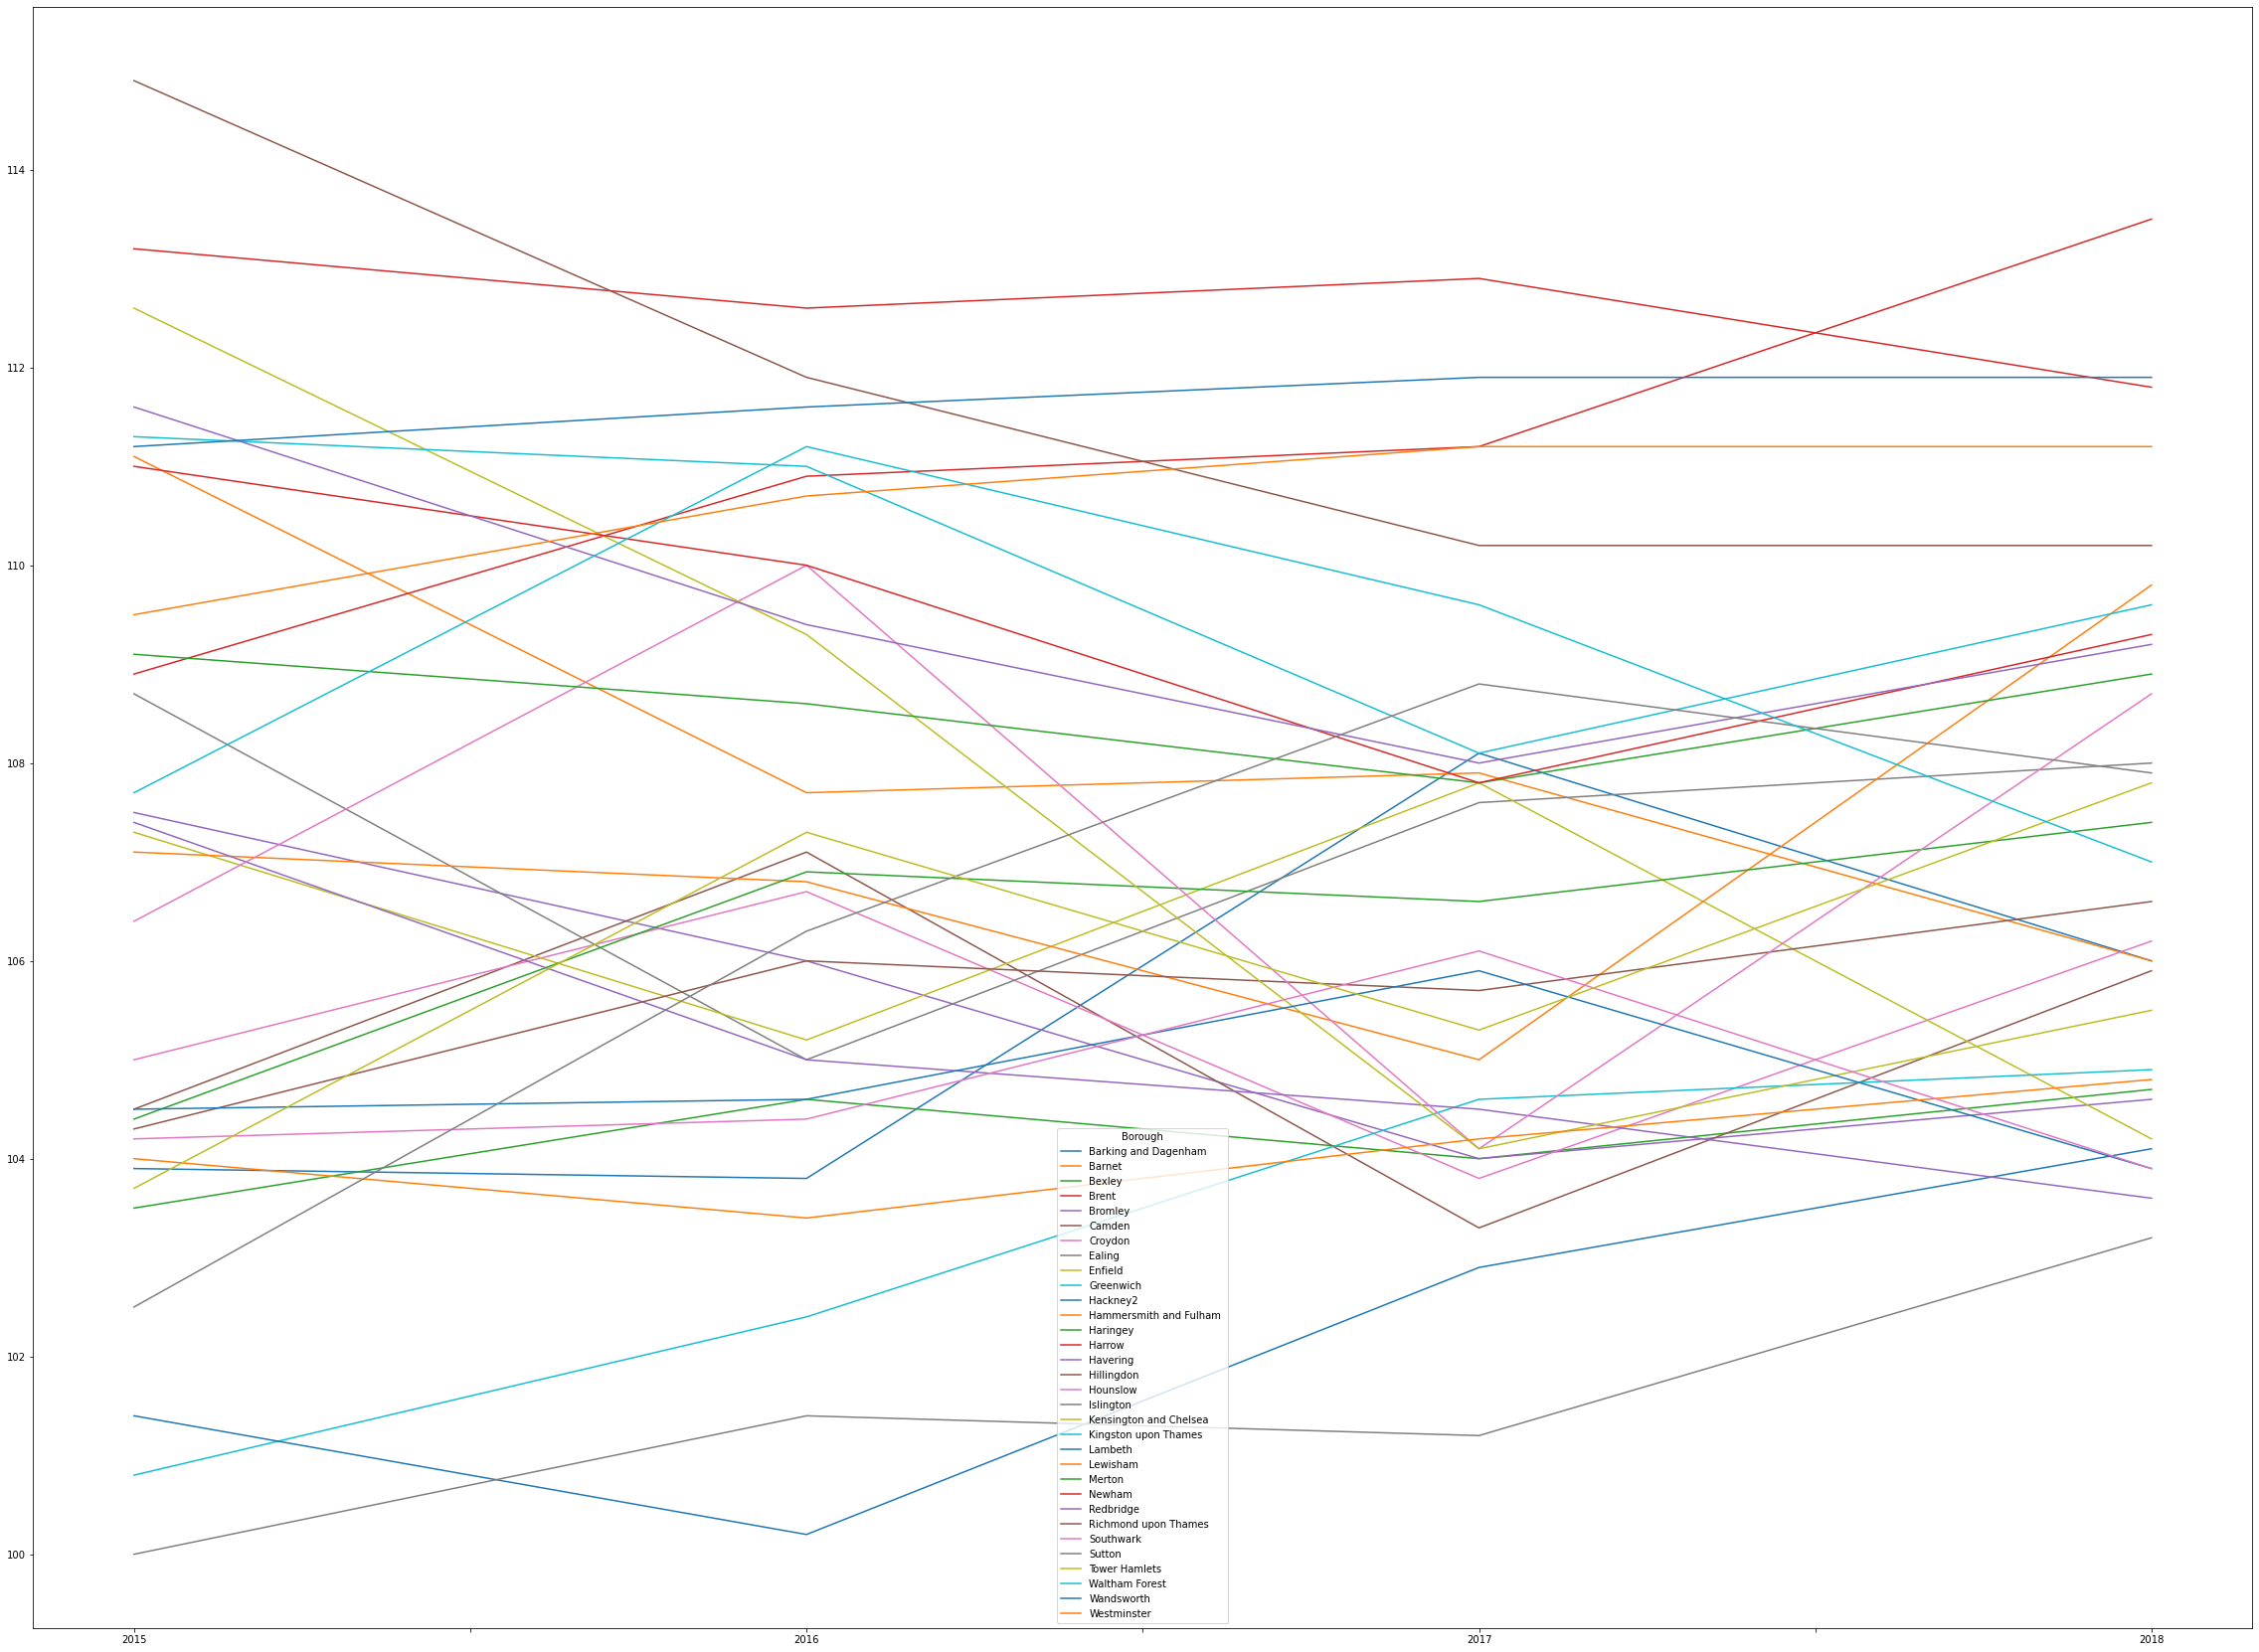

In [42]:
df_HP0.plot(kind = 'line', figsize =(40,30))

As you can see it is rather difficult to understand gain much insight here. There are too many boroughs all with different level of imporvement or deterioration in this index. 

It is possible to graph each year as a bar chart or as astacked bar chat instead. This will allow for a better comparison of how each borough has changed but as these changes are incredibly small, such as, Barking and Dangenham's decrease by 0.1 between 2015 and 2016. Not much insight will be gained from visulaising the data this way. 

So, instead, I will be calculating the average of each borough between 2015 to 2018 and then visualising each borough based on thier average HP indexes. Furthermore, I will sort by the highest average and examine the trend of the borough with the highest average, medium average and lowest average. <b> First let's transpose the df so it is easier to calculate the mean </b>

In [43]:
A = df_HP.mean(axis = 1)
A = pd.DataFrame(A)
mean = A.rename(columns = {0:'Average'})

In [44]:
df_HP = df_HP.merge(mean, how = 'right', on = 'Borough')

In [45]:
df_HP.sort_values(['Average'], ascending = False)

,2015,2016,2017,2018,Average
Borough,,,,,
Harrow,113.2,112.6,112.9,111.8,112.625
Richmond upon Thames,114.9,111.9,110.2,110.2,111.800
Wandsworth,111.2,111.6,111.9,111.9,111.650
Brent,108.9,110.9,111.2,113.5,111.125
Westminster,109.5,110.7,111.2,111.2,110.650
Kingston upon Thames,111.3,111.0,108.1,109.6,110.000
Redbridge,111.6,109.4,108.0,109.2,109.550
Newham,111.0,110.0,107.8,109.3,109.525
Waltham Forest,107.7,111.2,109.6,107.0,108.875


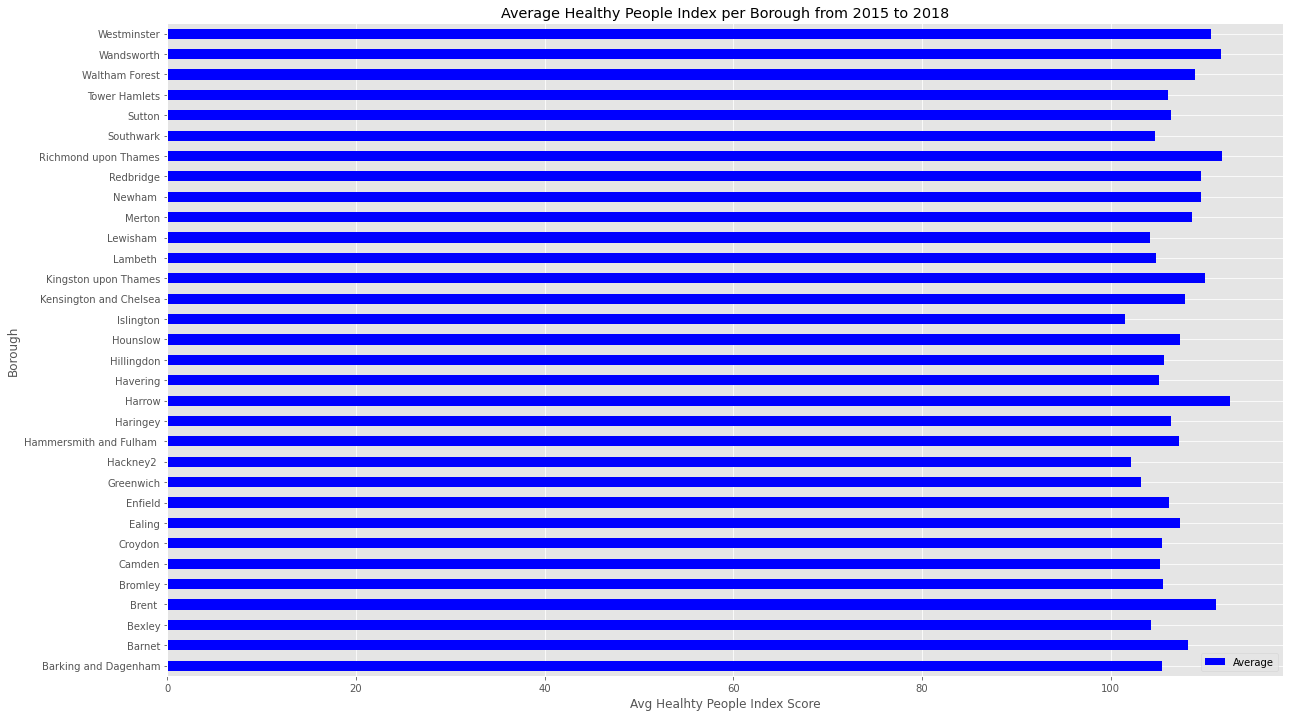

In [46]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

mean.plot(kind ='barh', color = 'blue', figsize = (20,12))

plt.title('Average Healthy People Index per Borough from 2015 to 2018')
plt.xlabel('Avg Healhty People Index Score')
plt.ylabel('Borough')

plt.show()

This bar graph although a little cluttered, visualises the avaerage improvements that each borough has seen over between 2015 - 2018. 

We can see that Harrow has the highest average and that islington has the lowest, with a 11.175 difference between the two. But this doesn't nessecarily reflect whether these boroughs are improving or deteriorting. It just tells the average state over the years. <b> One way to visulise the actuall improvement woud be taking the average of the changes between each year, rather than just the average of the scores. This is refelcted later when we examin the trend between the Islinglton and Harrow.</b> 

Now, let's plot these two to see the trends between them. As well as, taking the enitre avaerge of each year and then ploting the trend of the whole of London.

In [47]:
trend = df_HP.loc[['Harrow', 'Islington']]
trend = trend.drop(columns = ['Average'])
trend = trend.reset_index()
trend

,Borough,2015,2016,2017,2018
0,Harrow,113.2,112.6,112.9,111.8
1,Islington,100.0,101.4,101.2,103.2


In [48]:
df_HP.mean(axis = 0)

2015       106.975000
2016       107.125000
2017       106.693750
2018       107.196875
Average    106.997656
dtype: float64

In [49]:
London = pd.DataFrame({'Borough':['London'],
                       '2015':['106.9'],
                       '2016':['107.1'], 
                       '2017':['106.6'],
                       '2018':['107.1']
                      })
trend0 = trend.append(London)
trend0 = trend0.set_index('Borough',drop = True)
trend0 = trend0.astype(float)
trend0

,2015,2016,2017,2018
Borough,,,,
Harrow,113.2,112.6,112.9,111.8
Islington,100.0,101.4,101.2,103.2
London,106.9,107.1,106.6,107.1


In [50]:
trend1 = trend0.transpose()
trend1

Borough,Harrow,Islington,London
2015,113.2,100.0,106.9
2016,112.6,101.4,107.1
2017,112.9,101.2,106.6
2018,111.8,103.2,107.1


Text(0, 0.5, 'Healthy People Index Score')

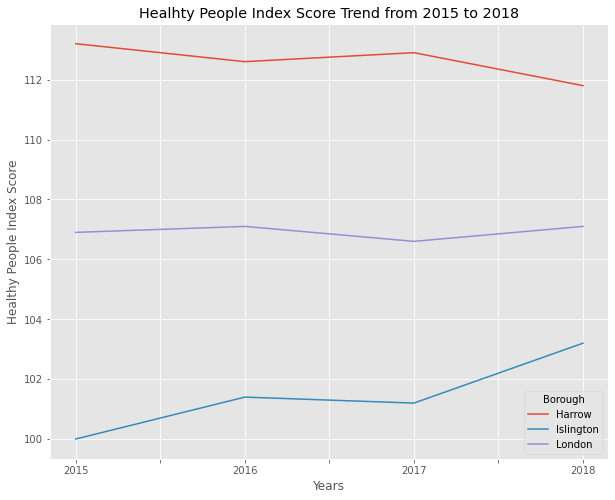

In [51]:
trend1.plot(kind= 'line', figsize =(10,8))

plt.title('Healhty People Index Score Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Healthy People Index Score')

Here we can see that despite, the fact that Harrow had a much higher average score than Islington in the HP index. They, unfortunatley, have experienced a decline over the years and are on a downwards trend. Where as, Islington, on the other hand, have seen incredible imporovment from 2015  to 2018. This is might be considered a more important factor than the simple avaerage as it suggest that Islington is improving from its lower scores. 

Whats more important here is looking at the average score each year for the whole of London. As we can see here, the trend for Lonodon, is marginal improvements. As it is the avaerge trend across london outliers, like Islington, will affect the trends. <b> Once more, it seems that to get a better picture of whether or not a borough or city is imporving, we shoudl take the average of the changes between each year rather than just the avaerge score. Unfortunaly, as that is not within the scoope of this exploration of this particular subdomain. I will not be examing this aspect here. Rather, I will be using this as justification for looking at the average changes between each year for the Overall Health Index.</b>

### Healthy Live Index

This Index score focuses on the healthy behaviours of people within each neighbourhood. This subdomain index was developed using the following attirbutes: <ul>
    <li>Psychological risk factors</li>
    <li>Behavioural risk factors</li>
    <li>Unemployment</li>
    <li>Working conditions</li>
    <li>Risk factors for children</li>
    <li>Children and young people's education</li>
    <li>Protective measures</li>
    </ul>

This arguebly is the most pertinent subdomin to helping business owners start a gym. 

In [81]:
HL15 = HI15
HL15 = HL15[['Borough', '2015 Healthy Lives']].copy()
HL16 = HI16[['2016 Healthy Lives']].copy()
HL17 = HI17[['2017 Healthy Lives']].copy()
HL18 = HI18[['2018 Healthy Lives']].copy()

In [82]:
HL0 = HL15.join(HL16)
HL0 = HL0.join(HL17)
HL0 = HL0.join(HL18)
HL0.set_index('Borough', inplace = True)
HL = HL0.rename(columns ={'2015 Healthy Lives': '2015', '2016 Healthy Lives': '2016', '2017 Healthy Lives': '2017', '2018 Healthy Lives': '2018'})
HL = HL.astype(float)
HL.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,90.9,93.1,94.3,94.0
Barnet,102.6,104.6,105.0,104.7
Bexley,99.8,103.0,101.4,102.9
Brent,96.3,97.0,96.1,96.4
Bromley,105.0,106.2,107.0,106.6


Now that we have created a clean and usable data frame on the Healthy lives index we can caluclate the average score for each borough

In [83]:
HLA = HL.mean(axis = 1)
HLA = pd.DataFrame(HLA)
HLA = HLA.rename(columns = {0:'Average'})

In [84]:
HLA = HLA[['Average']].div(100).round(2)

In [85]:
HL = HL.merge(HLA, how = 'right', on = 'Borough')
HL.head()

,2015,2016,2017,2018,Average
Borough,,,,,
Barking and Dagenham,90.9,93.1,94.3,94.0,0.93
Barnet,102.6,104.6,105.0,104.7,1.04
Bexley,99.8,103.0,101.4,102.9,1.02
Brent,96.3,97.0,96.1,96.4,0.96
Bromley,105.0,106.2,107.0,106.6,1.06


In [86]:
HL.sort_values(['Average'], ascending = False)

,2015,2016,2017,2018,Average
Borough,,,,,
Richmond upon Thames,110.5,112.4,113.3,113.8,1.12
Kingston upon Thames,108.5,110.4,110.3,108.8,1.10
Wandsworth,103.7,105.9,107.7,106.9,1.06
Bromley,105.0,106.2,107.0,106.6,1.06
Westminster,103.1,104.8,105.7,106.9,1.05
Camden,104.2,105.2,104.8,105.2,1.05
Southwark,102.7,104.0,103.8,103.8,1.04
Kensington and Chelsea,103.5,102.9,105.3,103.3,1.04
Barnet,102.6,104.6,105.0,104.7,1.04


In [89]:
HLA = HLA.set_index('Borough', drop = True)
HLA = HLA.sort_values('Average', ascending = False)
HLA.head()

,Average
Borough,
Richmond upon Thames,1.12
Kingston upon Thames,1.10
Wandsworth,1.06
Bromley,1.06
Westminster,1.05


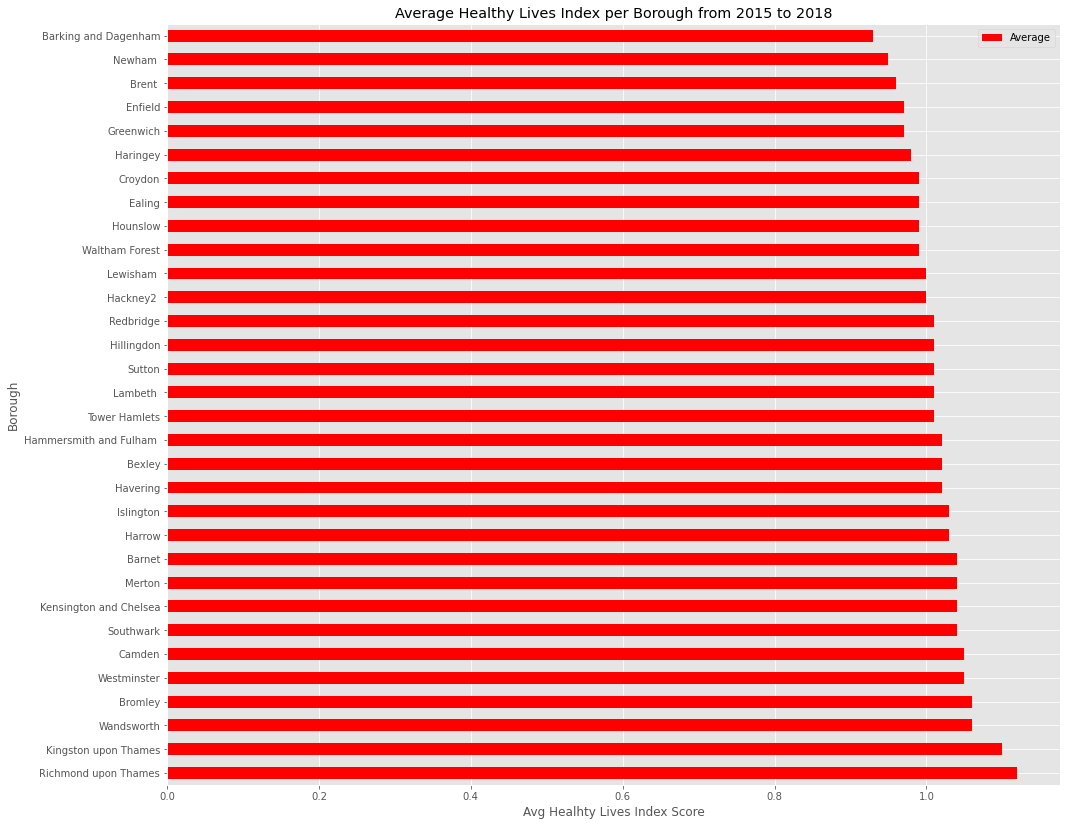

In [91]:
HLA.plot(kind ='barh', color = 'red', figsize = (16, 14))
plt.title('Average Healthy Lives Index per Borough from 2015 to 2018')
plt.xlabel('Avg Healhty Lives Index Score')
plt.ylabel('Borough')

plt.show()

We can see from the graph above that both Kingston Upon Thame and Richmond upon Thames have the highest average score incomparison to the rest of the borough for healthy lives. While, boroughs like Barking and Dagenham, Newham and, Brent are at the lower end. It is unclear as to why these boroughs rank where they do without conducting a deeper analysis of the data. However, as we have already seen, this score does not necessarily tell the enitre stroy. As with the previous index, the borough on the lower end may have seen imporvement from where they started.  

In [92]:
hltrend = HL.loc[['Richmond upon Thames', 'Barking and Dagenham', 'Redbridge',]]
hltrend = hltrend.drop(['Average'], axis = 1)
hltrend = hltrend.reset_index()
hltrend

,Borough,2015,2016,2017,2018
0,Richmond upon Thames,110.5,112.4,113.3,113.8
1,Barking and Dagenham,90.9,93.1,94.3,94.0
2,Redbridge,100.8,103.3,99.7,99.0


In [93]:
HL.mean(axis = 0)

2015       100.315625
2016       101.818750
2017       101.909375
2018       101.740625
Average      1.015313
dtype: float64

In [94]:
LL = pd.DataFrame({'Borough':['London'],
                       '2015':['100.315'],
                       '2016':['101.818'], 
                       '2017':['101.909'],
                       '2018':['101.74']
                      })

In [95]:
hltrend = hltrend.append(LL)

In [96]:
hltrend = hltrend.set_index('Borough',drop = True)
hltrend = hltrend.astype(float)
hltrend

,2015,2016,2017,2018
Borough,,,,
Richmond upon Thames,110.500,112.400,113.300,113.80
Barking and Dagenham,90.900,93.100,94.300,94.00
Redbridge,100.800,103.300,99.700,99.00
London,100.315,101.818,101.909,101.74


In [97]:
hltrend = hltrend.transpose()

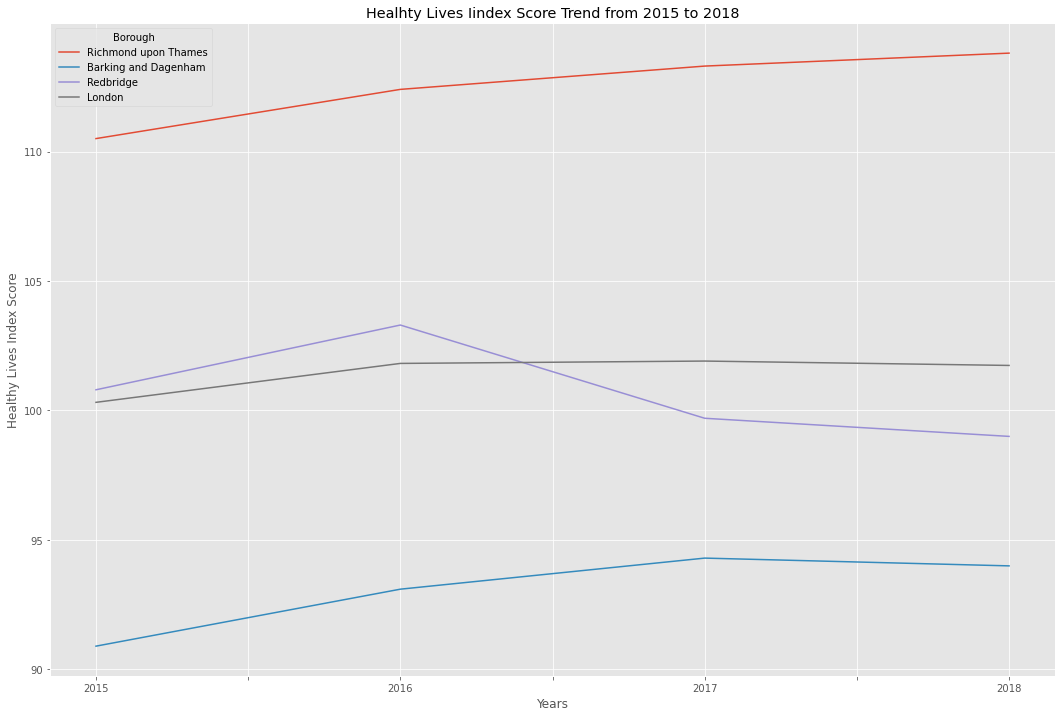

In [100]:
hltrend.plot(kind= 'line', figsize =(18,12))

plt.title('Healhty Lives Iindex Score Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Healthy Lives Index Score')

plt.show()

Unfortunately, unlike the previous trend graph, we can see that there is a clear difference between the borough with the highest score and the borough with the lowest score. While they have both seen an improvement over the last 3 years. Barking has experienced some stagnation and a slight decline in improvement from 2017 to 2018. Whereas, Richmons upon Thames has simply contiuned to improve in this aspect. What is interseting, however is to see how these boroughs have performed in comparison to the overall trend of London. 

While, each borough is fairly far away from the overall trend of London. They both share a similar increasing graident from 2015 to 2017 with the overall trend of London. In fact, Barking seems to follow the over all trend of London far closer than Richmond. This is become increasingly peculiar when we look at the third borough: Redbridge. Although, its score throughout the years is much closer to that of London's overall trend. There are much steeper kinks in its trend line. It is difficult to truly understand why this is the case without develing deeper into the data, but it does imply that despite all being a part of London, each borough experiences completely different economical and social changes.

## Healthy Places 

The Healthy Places index is the final subdomain used to asses the health of individual boroughs. It refelcts the quality of the enviroment a borough, but also includes scocial factors that affects living standard of a borough. The attirbutes used to develop the Healthy Places index are: 
<ul> 
    <li>Access to green space</li>
    <li>Local environment</li>
    <li>Access to services</li>
    <li>Access to housing</li>
    <li>Crime</li>
    </ul>

This is factor alone is rather important to out target audience. Firstly, if you were a bussiness owner and are looking to open a gym, one of the major factors that would influences the number of clients enrolling in a subscription would be directly impacted by the crime levels of neighbourhood or borough. A borough with a high crime rate is a risk and a negativ factor for each member of the target audience. You would be less inclined to attend a gym in a specific borough over another if it meant risking being in danger. 

Furthermore, factors like access to services and housing will influcence how likely people are to attend a gym. AS we continously see with society, people value their time and convience is a must. Having a gym that is in a borough that has a higher access to daily services, like shops, banks, resturants and work envrioments are advantageous. Furthermore, more people are likly to join or go to gyms that live near to them as it is more convenient. However, as this report is attempting to examine, there are various factors that can outweigh convience. 

With this in mind, let move on to examining the data. 


In [101]:
HE15 = HI15
HE15 = HE15[['Borough', '2015Healthy Places']].copy()
HE16 = HI16[['2016 Healthy Places']].copy()
HE17 = HI17[['2017 Healthy Places']].copy()
HE18 = HI18[['2018 Healthy Places']].copy()

In [102]:
HE0 = HE15.join(HE16)
HE0 = HE0.join(HE17)
HE0 = HE0.join(HE18)
HE0.set_index('Borough', inplace = True)
HE = HE0.rename(columns ={'2015Healthy Places': '2015', '2016 Healthy Places': '2016', '2017 Healthy Places': '2017', '2018 Healthy Places': '2018'})
HE = HE.astype(float)
HE.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,96.9,96.9,97.0,95.7
Barnet,97.1,96.6,96.2,95.6
Bexley,101.5,100.3,99.6,99.9
Brent,94.9,95.0,94.2,93.9
Bromley,99.5,98.9,98.5,98.3


In [103]:
HEA = HE.mean(axis = 1)
HEA = pd.DataFrame(HEA)
HEA = HEA.rename(columns = {0:'Average'})

In [104]:
HEA = HEA[['Average']].div(100).round(2)

In [105]:
HE = HE.merge(HEA, how = 'right', on = 'Borough')
HE.head()

,2015,2016,2017,2018,Average
Borough,,,,,
Barking and Dagenham,96.9,96.9,97.0,95.7,0.97
Barnet,97.1,96.6,96.2,95.6,0.96
Bexley,101.5,100.3,99.6,99.9,1.00
Brent,94.9,95.0,94.2,93.9,0.94
Bromley,99.5,98.9,98.5,98.3,0.99


In [106]:
HE.sort_values(['Average'], ascending = False)

,2015,2016,2017,2018,Average
Borough,,,,,
Sutton,101.5,100.5,100.8,100.3,1.01
Bexley,101.5,100.3,99.6,99.9,1.00
Havering,100.5,99.1,98.6,100.1,1.00
Richmond upon Thames,100.5,99.3,98.7,99.2,0.99
Bromley,99.5,98.9,98.5,98.3,0.99
Harrow,99.5,98.8,98.5,97.8,0.99
Merton,99.4,98.3,98.7,97.6,0.98
Hillingdon,97.6,97.2,96.4,95.9,0.97
Barking and Dagenham,96.9,96.9,97.0,95.7,0.97


In [108]:
HEA = HEA.sort_values('Average', ascending = False)
HEA.head()

,Average
Borough,
Sutton,1.01
Bexley,1.00
Havering,1.00
Richmond upon Thames,0.99
Bromley,0.99


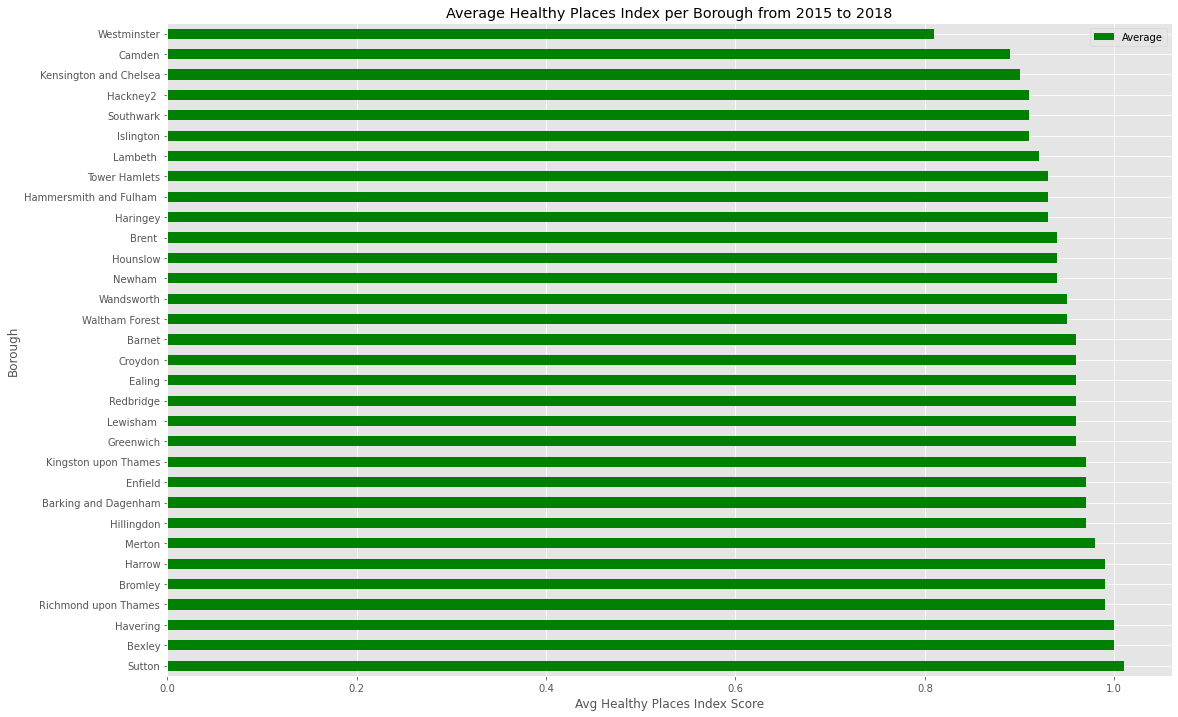

In [113]:
HEA.plot(kind ='barh', color = 'green', figsize = (18, 12))
plt.title('Average Healthy Places Index per Borough from 2015 to 2018')
plt.xlabel('Avg Healthy Places Index Score')
plt.ylabel('Borough')

plt.show()

Unlike the previous subdomain indexes, the Healthy Places index is far easier to understand. From the graph above we can see a ver clear dvide between the boroughs that correlate directly to their average healthy places index scores. The lowest ranked boroughs are Westninster, Camden, and Kensington and Chelsea respectively. Whereas the top scorers are Havering, Bexley, and Sutton respectively. 

We can understand why these boroughs are ranked where they are by simply looking at the visulaisation of the boroughs. The boroughs ranked at the lower end are all situated deep within the center of the city, where there is lesslikely to be lots of greener spaces. While the boroughs on the higher end are on the outskrits of London, where there are more likely to be large areas of undeveloped land. In fact, this can easily be seen in the map itself. Thus, once more, looking at how these boroughs have changed over time is more important than their simple scores. 

In [114]:
hetrend = HE.loc[['Sutton', 'Westminster', 'Croydon',]]
hetrend = hetrend.drop(['Average'], axis = 1)
hetrend = hetrend.reset_index()
hetrend

,Borough,2015,2016,2017,2018
0,Sutton,101.5,100.5,100.8,100.3
1,Westminster,82.4,83.1,81.2,78.5
2,Croydon,96.7,95.7,96.2,96.5


In [115]:
HE.mean(axis = 0)

2015       95.759375
2016       95.200000
2017       94.537500
2018       94.256250
Average     0.948750
dtype: float64

In [116]:
LE = pd.DataFrame({'Borough':['London'],
                       '2015':['95.759'],
                       '2016':['95.200'], 
                       '2017':['94.537'],
                       '2018':['94.256']
                      })

In [117]:
hetrend = hetrend.append(LE)

In [118]:
hetrend = hetrend.set_index('Borough',drop = True)
hetrend = hetrend.astype(float)
hetrend

,2015,2016,2017,2018
Borough,,,,
Sutton,101.500,100.5,100.800,100.300
Westminster,82.400,83.1,81.200,78.500
Croydon,96.700,95.7,96.200,96.500
London,95.759,95.2,94.537,94.256


In [120]:
hetrend = hetrend.transpose()

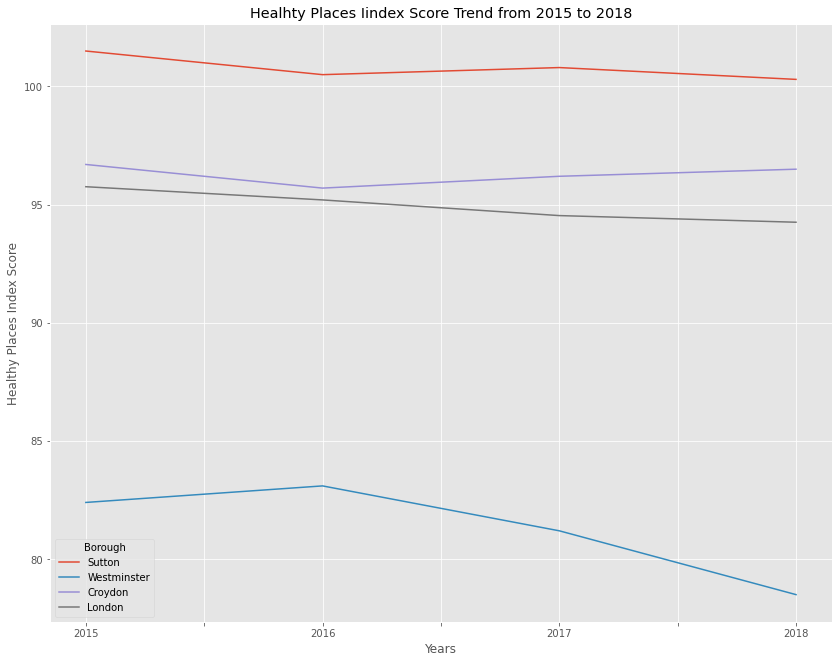

In [122]:
hetrend.plot(kind= 'line', figsize =(14,11))
plt.title('Healhty Places Iindex Score Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Healthy Places Index Score')

plt.show()

The graph above illustrates the trend of Sutton, a the borough with th ehighest Healthy place index, Westminster, which is the brough with the lowest average healthy place index score and Cryondon, which is in the middle. As well as, the overall trend of London as a whole. 

As the lines depict has been a decline in the Healthy places index score. While Westminster has seen a very steep decline from 2016, Sutton has also seen a decline since 2016, although of a much lower gradient. What's more is that both of these borough are in line with the overall trend of London, which has also declined over the years. As this line is the avaerage scores of every borough together, the gradient or the trending decline is more telling. Unlike with the earlier indexes there are no kinks in the line. It is a steady decline. 

An in depth answer to why there is a steady decline would require a much futher analysis of the data. One which is outside the scope of this prooject. However, one explination or presummption is that this score will always trend downhill as population increase. The attirbutes that compose the Healthy Places index would be heavily influence by an increase population. This is one possible explination of this trend. 

Oddly enough, however, We can see that Croydon is defying the overall trend and has seen a steady imporvement from 2016 onwards. This could be due to an increase in green areas, more housing being developed or a decline in crime. It is unclear what has caused this change. 

### The Overall Health index

With the individual subdomains briefly explored, some understanding hopefully has been convayed as to how the overall score has been developed. The overall score of each borough is the avaerage of all of its subdomains each year. Thus, a boroughs Health index for 2015 is the average of it Health people, Healhty Lives and Healthy places scores. 

The next few cells will focuse on exploring this score in a similar manner as before. Crucially, though, the following analysis will go a step further and look at the average change that each borough has seen over the years. This is important to members in the target audience that are looking at capitalising on boroughs that are developing and will have better scores in the future.  

In [123]:
H15 = HI15[['Borough', '2015 Overall Health Index (AVG) ']].copy()
H16 = HI16_df[['2016 Overall Health Index (AVG) ']].copy()
H17 = HI17_df[['2017 Overall Health Index (AVG) ']].copy()
H18 = HI18_df[['2018 Overall Health Index (AVG) ']].copy()

In [124]:
H0 = H15.join(H16)
H0 = H0.join(H17)
H0 = H0.join(H18)
H0.set_index('Borough', inplace = True)
H = H0.rename(columns ={'2015 Overall Health Index (AVG) ': '2015', '2016 Overall Health Index (AVG) ': '2016', '2017 Overall Health Index (AVG) ': '2017', '2018 Overall Health Index (AVG) ': '2018'})
H = H.astype(float)
H.head()

,2015,2016,2017,2018
Borough,,,,
Barking and Dagenham,97.2,97.9,99.8,98.6
Barnet,103.6,103.0,103.0,102.1
Bexley,101.6,102.6,101.7,102.5
Brent,100.0,101.0,100.5,101.3
Bromley,104.0,103.7,103.1,103.2


In [125]:
HA = H.mean(axis = 1)
HA = pd.DataFrame(HA)
HA = HA.rename(columns = {0:'Average'})
HA = HA[['Average']].div(100).round(2)
HA = HA.sort_values('Average', ascending = False)
HA

,Average
Borough,
Richmond upon Thames,1.08
Kingston upon Thames,1.06
Harrow,1.05
Wandsworth,1.04
Merton,1.04
Sutton,1.03
Barnet,1.03
Bromley,1.03
Havering,1.02


In [126]:
H = H.merge(HA, how = 'right', on = 'Borough')
H.head()

,2015,2016,2017,2018,Average
Borough,,,,,
Barking and Dagenham,97.2,97.9,99.8,98.6,0.98
Barnet,103.6,103.0,103.0,102.1,1.03
Bexley,101.6,102.6,101.7,102.5,1.02
Brent,100.0,101.0,100.5,101.3,1.01
Bromley,104.0,103.7,103.1,103.2,1.03


In [127]:
H['Growth from 2015 to 2018'] = H['2018'] - H['2015']
H['Average Growth'] = H['Growth from 2015 to 2018'].div(3).round(2)
H['AVG Growth %'] = H['Average Growth'].mul(100)
H

,2015,2016,2017,2018,Average,Growth from 2015 to 2018,Average Growth,AVG Growth %
Borough,,,,,,,,
Barking and Dagenham,97.2,97.9,99.8,98.6,0.98,1.4,0.47,47.0
Barnet,103.6,103.0,103.0,102.1,1.03,-1.5,-0.50,-50.0
Bexley,101.6,102.6,101.7,102.5,1.02,0.9,0.30,30.0
Brent,100.0,101.0,100.5,101.3,1.01,1.3,0.43,43.0
Bromley,104.0,103.7,103.1,103.2,1.03,-0.8,-0.27,-27.0
Camden,99.7,101.0,98.4,99.7,1.00,0.0,0.00,0.0
Croydon,100.0,100.6,99.5,100.7,1.00,0.7,0.23,23.0
Ealing,101.5,100.0,101.1,100.9,1.01,-0.6,-0.20,-20.0
Enfield,100.7,100.0,100.1,98.7,1.00,-2.0,-0.67,-67.0


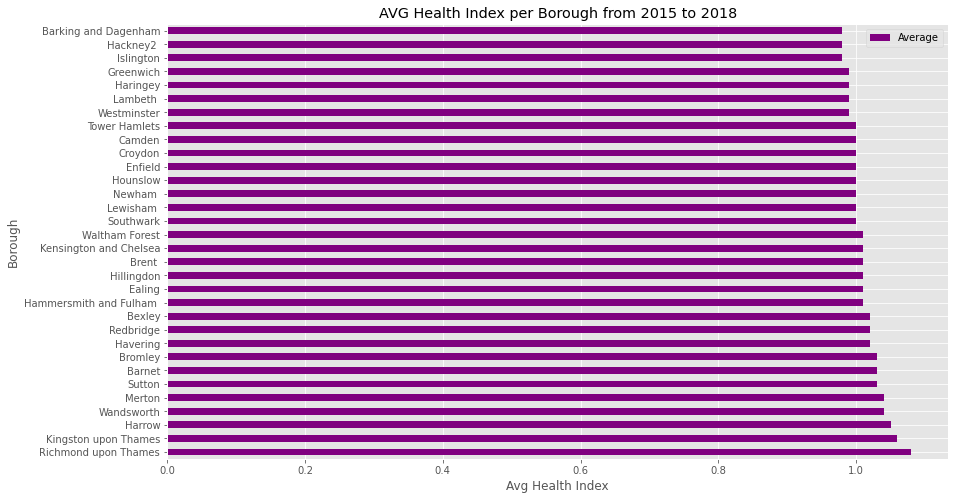

In [128]:
HA.plot(kind ='barh', color = 'purple', figsize = (14, 8))
plt.title('AVG Health Index per Borough from 2015 to 2018')
plt.xlabel('Avg Health Index')
plt.ylabel('Borough')

plt.show()

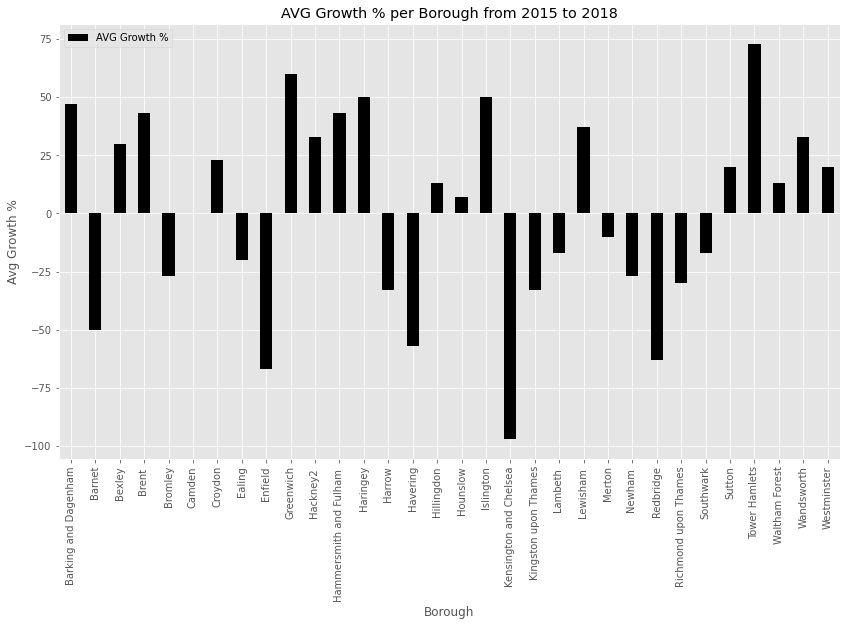

In [90]:
OG = H[['AVG Growth %']].copy()
OG.plot(kind ='bar', color = 'k', figsize = (14, 8))
plt.title('AVG Growth % per Borough from 2015 to 2018')
plt.xlabel('Borough')
plt.ylabel('Avg Growth %')

plt.show()

In [109]:
Htrend = H.loc[['Richmond upon Thames', 'Barking and Dagenham', 'Tower Hamlets', 'Kensington and Chelsea' ]]
Htrend = Htrend.drop(['Growth from 2015 to 2018', 'Average Growth', 'AVG Growth %', 'Average'], axis = 1)
Htrend = Htrend.reset_index()
Htrend

,Borough,2015,2016,2017,2018
0,Richmond upon Thames,108.6,107.9,107.4,107.7
1,Barking and Dagenham,97.2,97.9,99.8,98.6
2,Tower Hamlets,98.7,100.1,99.7,100.9
3,Kensington and Chelsea,102.3,101.1,99.8,99.4


In [110]:
H.mean(axis = 0)

2015                        101.018750
2016                        101.387500
2017                        101.050000
2018                        101.065625
Average                       1.011875
Growth from 2015 to 2018      0.046875
Average Growth                0.014688
AVG Growth %                  1.468750
dtype: float64

In [111]:
L = pd.DataFrame({'Borough':['London'],
                       '2015':['101.019'],
                       '2016':['101.388'], 
                       '2017':['101.05'],
                       '2018':['101.066']
                      })
Htrend = Htrend.append(L)

In [112]:
Htrend = Htrend.set_index('Borough',drop = True)
Htrend = Htrend.astype(float)
Htrend

,2015,2016,2017,2018
Borough,,,,
Richmond upon Thames,108.600,107.900,107.40,107.700
Barking and Dagenham,97.200,97.900,99.80,98.600
Tower Hamlets,98.700,100.100,99.70,100.900
Kensington and Chelsea,102.300,101.100,99.80,99.400
London,101.019,101.388,101.05,101.066


In [113]:
Htrend = Htrend.transpose()

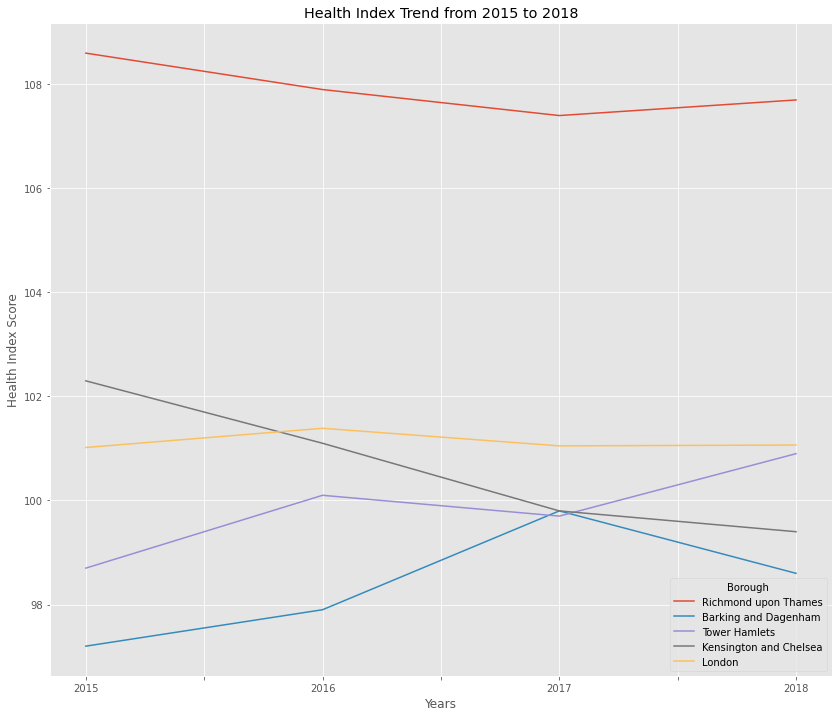

In [114]:
Htrend.plot(kind= 'line', figsize =(14,12))
plt.title('Health Index Trend from 2015 to 2018')
plt.xlabel('Years')
plt.ylabel('Health Index Score')

plt.show()

We can see in the graph above that there is a varying degree of difference between neighbourhoods. The graph reflects mainly the outliers of all of the boroughs. This is intentioanal it can be used to asses whether there are borough that are improving and could be potential areas to open a Gym. <b> This is particularlly the case with Tower Hamlets. </b> We can see that in comparision to the yellow line, London's overall trend, Tower Hamlets has seen a very drastic improvement in its Health Index from 2015 to 2018. This could potentially mean that the borough is seeing a lot of developement and could continue to improve further down the line. 

As a business owner or potential business owner this is can be increidibly attracitive. As it could mean investing in opening a Gym in a borough now and, hopfully, capitalising on future developement and customers. 

<b> Unforutnaly, the Health Index data doesn't include any data concering how each borough has been affected by Covid19 and the restrictions that have come into place. Without this we can not state that the trends shown above have or will be consistent. In fact, the trends and growths that some of these boroughs has seen in the previous years may have been either completely halted or eroded by the affects of Covid. </b>

As such, safe guarding against Covid and Lockdown restrictions is an important factor for those looking to attend or run a gym. And to attempt to do so we need to look at the vaccine data per borough. 

# Vaccine Data

The intended use of the vaccine data is to analyse which boroughs have a higher levels of vaccincation than others. In doing so, it provides our target audience an other set of information on each borough to help them perhaps choose where a borough which <b> may</b> see a slower rate of infection. 

Furthermore, as gyms are considered a hotspot for Covid 19, areas that have a high R repoduciton rate of the virus are more likely to see lockdowns which shut gyms down. While, inversely area with higher vaccine rates will have a lower R repoduction rate and are <b> likely </b> to see less restrictions. This could mean being able to keep gyms open in one borough, which may mean maintaing monthly subcriptions from customers. While in another borough all gyms are closed. 

In [1]:
# The code was removed by Watson Studio for sharing.

,Borough,Sum 1st dose,Sum 2nd dose,Cumulative Total Doses (1st and 2nd doses) to Date6
0,Barking and Dagenham,97039.0,62838.0,159877.0
1,Barnet,217408.0,154911.0,372319.0
2,Bexley,144780.0,101368.0,246148.0
3,Brent,181215.0,118709.0,299924.0
4,Bromley,203236.0,143412.0,346648.0


In [2]:
for col in df_data_7:
    print(col)

Borough
Sum 1st dose
Sum  2nd dose
Cumulative Total Doses (1st and 2nd doses) to Date6


Before moiving on to cleaning the data. PLease note, that the original data set records both 1st dose and 2nd dose separatly. AS mentioned in the data section of the report, I will only be taking  entries with 2nd dose as an indiivdual who is vaccinated. 

In [3]:
vc_df = df_data_7.rename(columns={'Cumulative Total Doses (1st and 2nd doses) to Date6': 'Cumluative Total Doses'})

In [4]:
vc = vc_df.set_index('Borough', drop = True)

In [5]:
vc['% of 1st dose'] = (vc['Sum 1st dose'])/(vc['Cumluative Total Doses'])

In [6]:
vc['% of 2nd dose'] = (vc['Sum  2nd dose'])/(vc['Cumluative Total Doses'])

In [7]:
vc = vc.reset_index()

In [8]:
vc.head()

,Borough,Sum 1st dose,Sum 2nd dose,Cumluative Total Doses,% of 1st dose,% of 2nd dose
0,Barking and Dagenham,97039.0,62838.0,159877.0,0.606960,0.393040
1,Barnet,217408.0,154911.0,372319.0,0.583929,0.416071
2,Bexley,144780.0,101368.0,246148.0,0.588183,0.411817
3,Brent,181215.0,118709.0,299924.0,0.604203,0.395797
4,Bromley,203236.0,143412.0,346648.0,0.586289,0.413711


In [9]:
vc_pl = vc[['Borough','% of 1st dose','% of 2nd dose']].copy()

In [10]:
vc_pl = vc_pl.set_index('Borough', drop = True)

In [11]:
vc_pl.head()

,% of 1st dose,% of 2nd dose
Borough,,
Barking and Dagenham,0.606960,0.393040
Barnet,0.583929,0.416071
Bexley,0.588183,0.411817
Brent,0.604203,0.395797
Bromley,0.586289,0.413711


NameError: name 'plt' is not defined

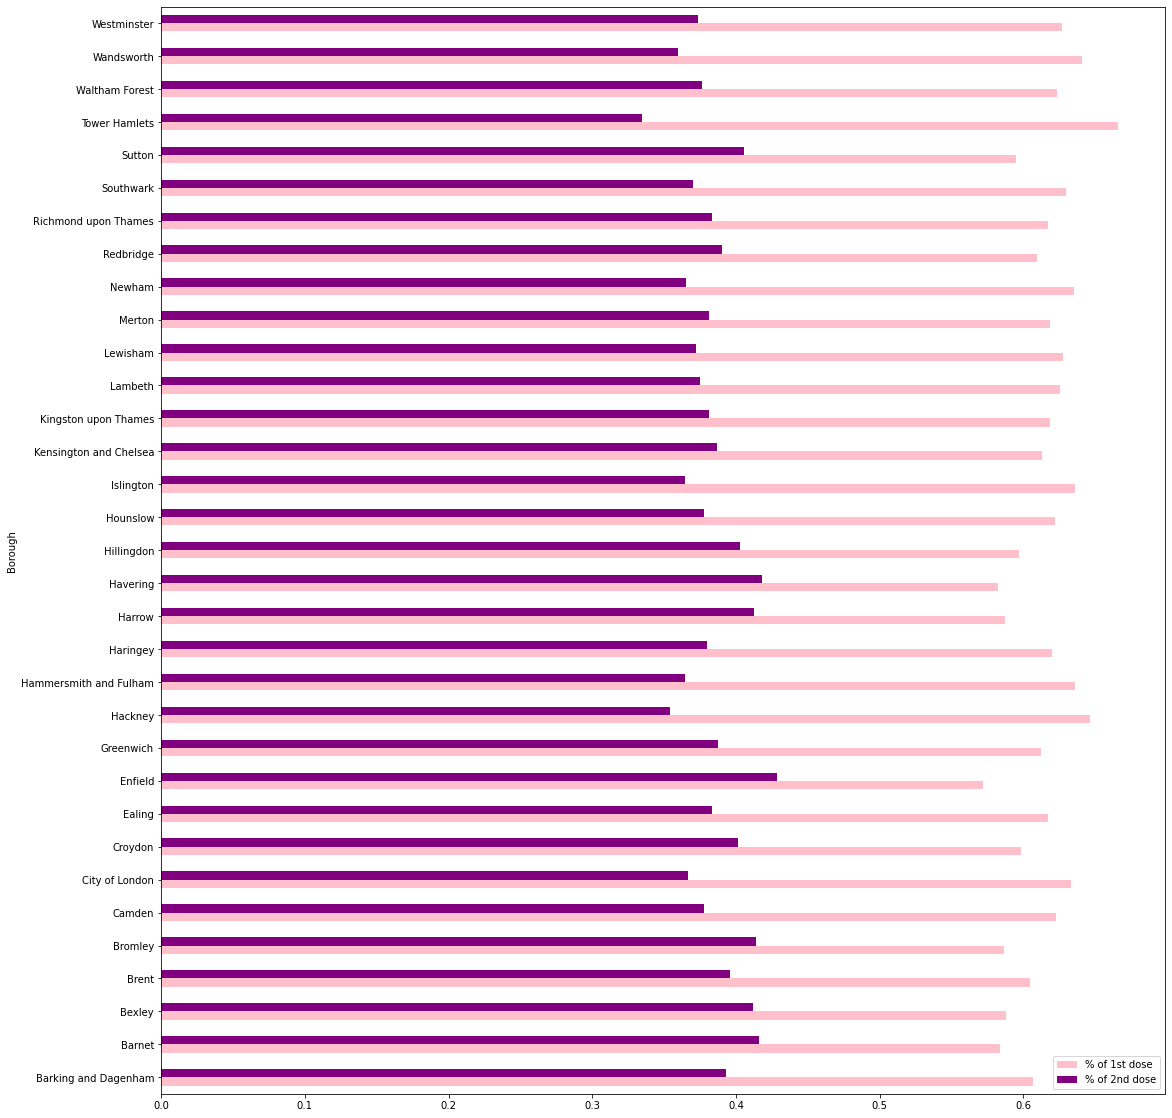

In [91]:
vc_pl.plot(kind = 'barh', stacked = False, figsize=(18,20), color = ('pink','purple'))

plt.title('Number of Vaccinated Residents per Borough')
plt.xlabel('% of Vaacinated Residents')
plt.ylabel('Borough')

plt.show()

From the graph above we can see that Enfield, at the time of this data set was produced has the highest number of fully vaccinated residents. This means that Enfield could potentially be one of the more robust borough in London to future lockdowns and covid case. 

That being said, we can not discount the number of residents with only one dose of the vaccine. From the graph, it is clear that Tower Hamlets current has the highest number of residence who have recieved one does of the vaccine. In the future then, once these residence recieve the 2nd dose. Tower Hamlets will have the highest rate of vaccinated residence, provided they maintain a effiecient vaccination rate.

Thus, the argument could be made that Tower Hamlets will become the most robust area in London to the spread of covid19 and future lockdowns. Furthermore, as we saw with the Overall Health Index trends, Tower Hamlets has had the highest average level of imporvement from 2015 to 2018. Although, they might not be the highest rated borough in terms of overall health. They are a borough that it on the rise and for prospective gym owners or business owners Tower Hamlets tend could be very enticing. As it currently may offer a lower costs to opening a business in comparison to other boroughs ranked higher on the index, with the potential for a higher rate of retuner in the future. i.e. Tower Hamlets might be a better borough to look into investing for the future.

On the other hand, this may not apply for customers who won't be looking for a long term return on an investment (+5 years) but rather a gym that they could join now and can safe guard agaisnt lockdown measures and Covid19 cases. For customers areas like Havering, Harrow, and Barnet which ranks on the higher end of the Health index and has one of the highest number of fully vaccinated residents.

# Gyms

With several potential boroughs identified as pontential areas to open up a gym or join a gym. We can use the Foursquare API to idenitfy boroughs where Gyms are amoung thier most popular venues

In [49]:
th = geo
th.head()

,Area Codes,Borough,Latitude,Longitude
0,E09000002,Barking and Dagenham,51.554117,0.150504
1,E09000003,Barnet,51.653090,-0.200226
2,E09000004,Bexley,51.441679,0.150488
3,E09000005,Brent,51.563996,-0.275906
4,E09000006,Bromley,51.402805,0.014814


In [50]:
# The code was removed by Watson Studio for sharing.

In [57]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                             'lat',
                             'lng',
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [58]:
th_venue = getNearbyVenues(names=th['Borough'],
                           latitudes=th['Latitude'],
                           longitudes=th['Longitude']
                          )



Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [64]:
print(th_venue.shape)
th_venue.head(20)

(1177, 7)


,Borough,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
1,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
2,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store
3,Barking and Dagenham,51.554117,0.150504,Robertsons Fishing Tackle,51.551132,0.154619,Fishing Store
4,Barnet,51.653090,-0.200226,Ye Old Mitre Inne,51.652940,-0.199507,Pub
5,Barnet,51.653090,-0.200226,Caffè Nero,51.654861,-0.201743,Coffee Shop
6,Barnet,51.653090,-0.200226,The Black Horse,51.653075,-0.206719,Pub
7,Barnet,51.653090,-0.200226,Waterstones,51.655368,-0.202607,Bookstore
8,Barnet,51.653090,-0.200226,Domino's Pizza,51.652675,-0.198837,Pizza Place
9,Barnet,51.653090,-0.200226,Boots,51.655305,-0.201745,Pharmacy


In [68]:
t_onehot = pd.get_dummies(th_venue[['Venue Category']], prefix =" ", prefix_sep=" ")
t_onehot

,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Bakery,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
t_onehot['Borough'] = th_venue['Borough']
t_onehot

,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Bakery,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Borough
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barking and Dagenham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Westminster
1173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Westminster
1174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Westminster
1175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Westminster


In [72]:
fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]
print(t_onehot.shape)

(1177, 212)


In [73]:
t_onehot.head()

,Borough,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
t_grouped = t_onehot.groupby('Borough').mean().reset_index()
t_grouped.head()

,Borough,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bromley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02381,0.0,...,0.0,0.02381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
num_top_v = 5

for Borough in t_grouped['Borough']: 
    print("----"+Borough+"----")
    temp = t_grouped[t_grouped['Borough'] == Borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_v))
    print('\n')

----Barking and Dagenham----
                 venue  freq
0             Bus Stop  0.25
1        Grocery Store  0.25
2         Liquor Store  0.25
3        Fishing Store  0.25
4    Accessories Store  0.00


----Barnet----
                    venue  freq
0             Coffee Shop  0.13
1                     Pub  0.10
2                    Park  0.10
3              Restaurant  0.07
4    Fast Food Restaurant  0.07


----Bexley----
                venue  freq
0                 Pub   0.1
1        Tennis Court   0.1
2    Toy / Game Store   0.1
3       Train Station   0.1
4    Greek Restaurant   0.1


----Brent----
                 venue  freq
0          Coffee Shop  0.21
1                Hotel  0.14
2    Electronics Store  0.07
3                 Café  0.07
4           Food Court  0.07


----Bromley----
              venue  freq
0       Coffee Shop  0.12
1    Clothing Store  0.12
2       Pizza Place  0.07
3         Newsagent  0.05
4      Burger Joint  0.05


----Camden----
                  venu

In [82]:
def return_most_common_venues(row, num_top_v):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_v]

In [83]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [86]:
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = t_grouped['Borough']

for ind in np.arange(t_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(t_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,Liquor Store,Bus Stop,Fishing Store,Grocery Store,Furniture / Home Store
1,Barnet,Coffee Shop,Pub,Park,Restaurant,Convenience Store
2,Bexley,Indian Restaurant,Convenience Store,Tennis Court,Breakfast Spot,Fast Food Restaurant
3,Brent,Coffee Shop,Hotel,Pub,Burger Joint,Pedestrian Plaza
4,Bromley,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Portuguese Restaurant
5,Camden,Pub,Italian Restaurant,Coffee Shop,Burger Joint,Ice Cream Shop
6,Croydon,Pub,Coffee Shop,Sandwich Place,Portuguese Restaurant,Café
7,Ealing,Coffee Shop,Pub,Platform,Grocery Store,Clothing Store
8,Enfield,Café,Coffee Shop,Clothing Store,Gift Shop,Pharmacy
9,Greenwich,Boat or Ferry,Coffee Shop,Pub,Café,Pier


With the top % most common venues of we can see that there are two boroughs that have Gyms as there 4th most common type of venue. These two being Southwark and Bromley. For Customers who are looking to join a gym these are increibly attractive boroughs. Firstly, as these types of venues are among the 4th most common venues, there is a high chance that there is an increased amount of price competetion between gyms. As such, they will have more competitive price ranges. 

Additionally, as Bromely ranks as one of the higher boroughs on the Health index, as well as, having a higher % of fully vaccinated residents. Bromley will have access to a housing and plently of services. In addition to plently of green spaces and a lower crime rate than other Boroughs. 

While Southwalk has a lower ranking on the health index it as well as % of fully vaccinated residents. So it many not have as much acess to housing and services as Bromley. It does have one of the higher number of residents who have has atleast one vaccination. So in the near future, there is a high probability that Southwalk has a high number of fully vaccinated residents and is hopefully more robust to the spread of covid19. 

Thus, for people looking to join a gym who either will live or live London, Southwalk and Bromley seem like a good choices. 

However, for those who are looking to start a business particulary, those who want intersted in a longer term return then areas such as Tower Hamlets might be a good investment now. As it seem like the local authority has been working to improve the overall standing of the borough between 2015 to 2018. If we presume this trend will continue, then perhaps purachsing property now might yeild higher returns in the long terms. 

However, a shorter term soultion may be Havering. It ranks rather high on both the health index which means it is an area with access to housing and plently of services. In addition, to plently of green spaces and a lower crime rate than other Boroughs. Havering, is also one of the boroughs with a higher number of fully vaccinated residents so it too may be more resistent to the spread of covid. Unfortunatley, by looking at Havering's top 5 venues there are none that indicate that health nor fitness is a high priority in Havering. This could mean that either there are very smalll supply of gyms however there is still a high demand for gym. Thus, opening a gym could be profitable in Havering. Or, there isnt a high demand for gyms in Havering. To develope a much clearer anwser we would have to do further market research on gyms withing each borough. 